# Linear Regression Model

#### 0. Split
#### 1. Normalize
#### 2. Train
#### 3. Predict
#### 4. Analyze

### Imports

In [139]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [51]:
os.getcwd()

'/Users/sophiacolonello/Desktop/school/junior year/second semester/data3000-adv-ds/chatgpt-influencer/data/processed'

In [140]:
os.chdir(path="/Users/sophiacolonello/Desktop/school/junior year/second semester/data3000-adv-ds/chatgpt-influencer/data/processed")
data = pd.read_csv("chatgpt_data_final.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,Name,Age,Years_Active,Beauty_Level,Award_Wins,Media_Mentions,Social_Media_Followers,Social_Media_Likes,...,Music Production,Personal Training,Public Speaking,Software Development,Travel Writing,Bachelor's,Culinary School,High School Diploma,Master's,Self-Taught
0,0,0,Ava Johnson,32,7,8,3.0,500.0,1000000.0,50000.0,...,0,0,1,0,0,1,0,0,0,0
1,1,1,Jackson Lee,28,5,7,2.0,300.0,800000.0,40000.0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,Sophie Garcia,35,8,9,5.0,600.0,1200000.0,70000.0,...,0,0,0,0,0,0,0,0,1,0
3,3,3,Ryan Patel,30,6,6,3.0,400.0,900000.0,45000.0,...,0,0,0,0,0,0,1,0,0,0
4,4,4,Emma Chen,25,4,7,2.0,250.0,600000.0,35000.0,...,0,0,0,0,0,1,0,0,0,0


In [141]:
data.shape

(607, 165)

In [142]:
data = data.dropna()

### 0. Split

In [143]:
# Concentrate Features and Labels

# what do we not want (dropping MBTI for now lol)
ew = ['Unnamed: 0.1', 'Unnamed: 0','Name','Income_Per_Year', 'First_Name','Last_Name', 'MBTI_Personality']
target = data['Income_Per_Year']
features = data.drop(ew, axis=1)

In [144]:
features.head()

,Age,Years_Active,Beauty_Level,Award_Wins,Media_Mentions,Social_Media_Followers,Social_Media_Likes,Network_Size,Female,Male,...,Music Production,Personal Training,Public Speaking,Software Development,Travel Writing,Bachelor's,Culinary School,High School Diploma,Master's,Self-Taught
0,32,7,8,3.0,500.0,1000000.0,50000.0,5.0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,28,5,7,2.0,300.0,800000.0,40000.0,4.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,35,8,9,5.0,600.0,1200000.0,70000.0,6.0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,30,6,6,3.0,400.0,900000.0,45000.0,5.0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,25,4,7,2.0,250.0,600000.0,35000.0,4.0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [145]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=104, test_size=0.30)

### 1. Normalize

In [146]:
#X_train = X_train.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))
#X_train.head()

In [147]:
X_train = X_train.dropna()

In [148]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [149]:
model = LinearRegression().fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.9232996560894562


In [150]:
X_train_condense = [np.mean(num_list) for num_list in X_train]    

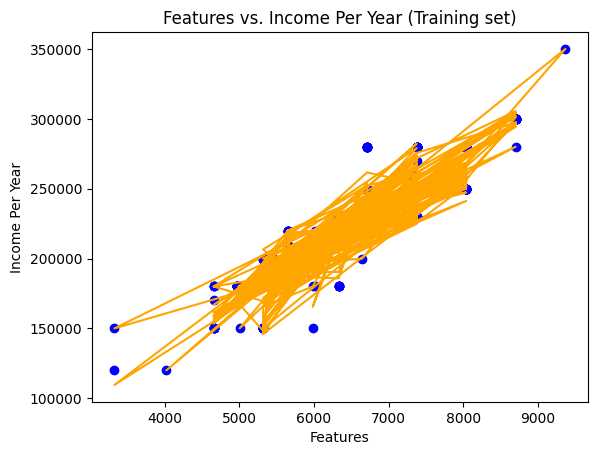

In [131]:
plt.scatter(X_train_condense, y_train, color = "blue")
plt.plot(X_train_condense, model.predict(X_train), color = "orange")
plt.title("Features vs. Income Per Year (Training set)")
plt.xlabel("Features (Average of the values")
plt.ylabel("Income Per Year")
plt.show()

### 3. Predict

In [132]:
predictions = model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [135]:
X_test_condense = [np.mean(num_list) for num_list in X_test]    

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U3'), dtype('<U3')) -> None

ValueError: x and y must be the same size

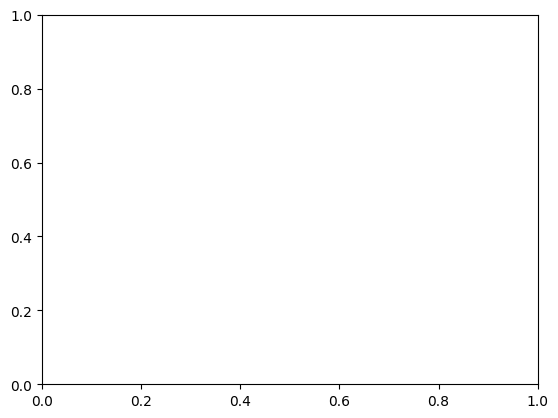

In [136]:
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, predictions, color = "orange")
plt.title("Features vs. Income Per Year (Training set)")
plt.xlabel("Features (Average of the values)")
plt.ylabel("Income Per Year")
plt.show()